In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
data = pd.read_csv(r"C:\Users\akshada\torgo_data\data.csv")
print(data.shape)

(2000, 3)


In [3]:
dir_ = "C:/Users/akshada/"

data['filename'] = dir_ + data['filename']

In [4]:
data.head()

,is_dysarthria,gender,filename
0,non_dysarthria,female,C:/Users/akshada/torgo_data/non_dysarthria_fem...
1,non_dysarthria,female,C:/Users/akshada/torgo_data/non_dysarthria_fem...
2,non_dysarthria,female,C:/Users/akshada/torgo_data/non_dysarthria_fem...
3,non_dysarthria,female,C:/Users/akshada/torgo_data/non_dysarthria_fem...
4,non_dysarthria,female,C:/Users/akshada/torgo_data/non_dysarthria_fem...


<AxesSubplot:xlabel='is_dysarthria', ylabel='count'>

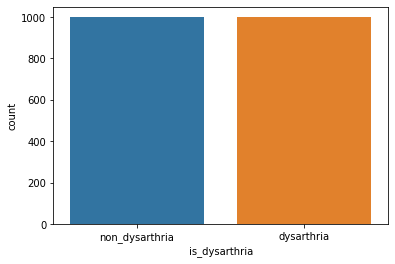

In [5]:
sns.countplot(x=data['is_dysarthria'])

**Defining functions for various plots**

In [6]:
#Waveplot
def get_waveplot(path, target, gender):
    x, sr = librosa.load(path)
    plt.figure(figsize=(20,5))
    librosa.display.waveshow(x, sr=sr)
    plt.title("Target: " + target + " " + "Gender: " + gender)
    plt.show()

In [7]:
#Mel-Frequency Cepstral Coefficient -> 128 coeffs
def get_mfcc(path, target, gender):
    x, sr = librosa.load(path)
    mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
    print(mfccs.shape)
    plt.figure(figsize=(20, 5))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.title('MFCC of '+ target + " " + gender)
    plt.show()

In [8]:
#Mel-Spectrogram -> 128 bands
def get_melspec(path, target, gender):
    x, sr = librosa.load(path)
    melspec = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128)
    print(melspec.shape)
    plt.figure(figsize=(20, 5))
    librosa.display.specshow(melspec, sr=sr, x_axis='time')
    plt.title('Mel Spectrogram of '+ target + ' ' + gender)
    plt.show()

## **Visualizing Waveplots**

**Speech of a male with no dysarthria**

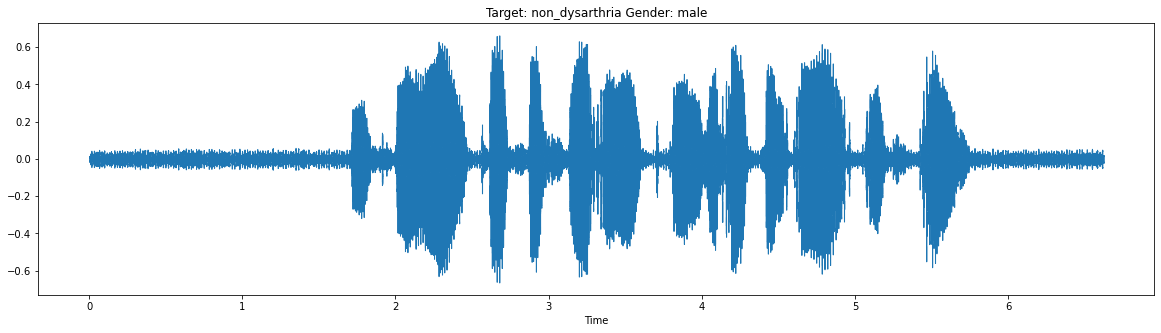

In [9]:
sample = data[(data['is_dysarthria']=='non_dysarthria') & (data['gender']=='male')] 
get_waveplot(sample['filename'].values[20], sample['is_dysarthria'].values[20], sample['gender'].values[20])
ipd.Audio(sample['filename'].values[20])

**Male with dysarthria**

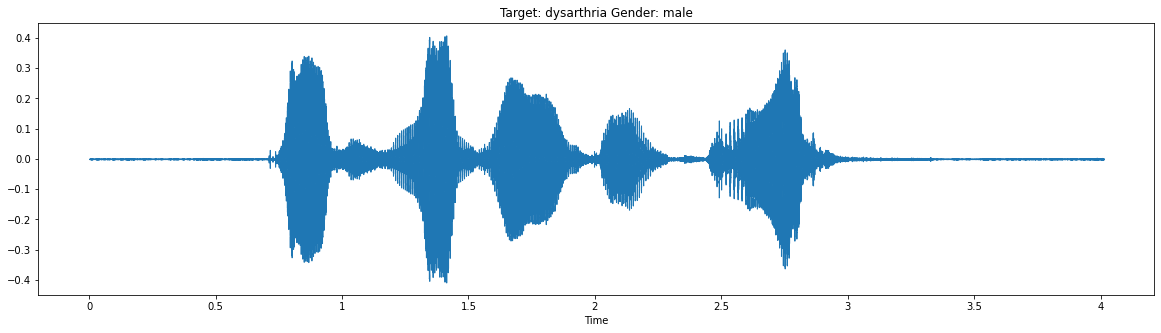

In [10]:
sample = data[(data['is_dysarthria']=='dysarthria') & (data['gender']=='male')] 
get_waveplot(sample['filename'].values[20], sample['is_dysarthria'].values[20], sample['gender'].values[20])
ipd.Audio(sample['filename'].values[20])

**Female with no dysarthria**

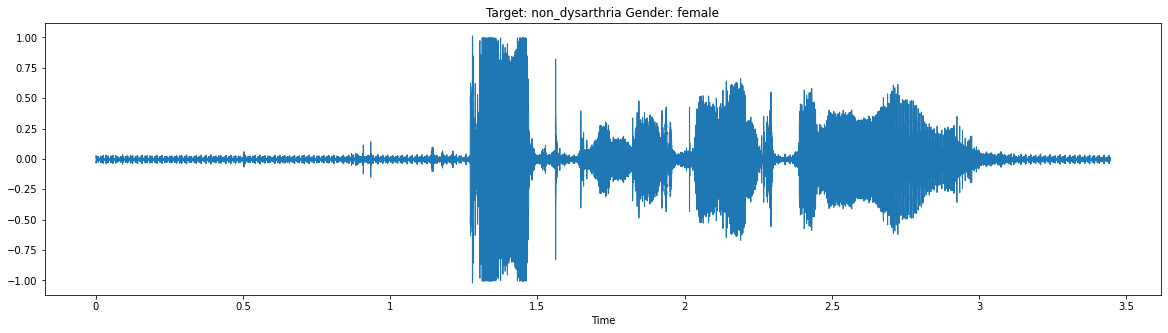

In [11]:
sample = data[(data['is_dysarthria']=='non_dysarthria') & (data['gender']=='female')] 
get_waveplot(sample['filename'].values[20], sample['is_dysarthria'].values[20], sample['gender'].values[20])
ipd.Audio(sample['filename'].values[20])

**Female with dysarthria**

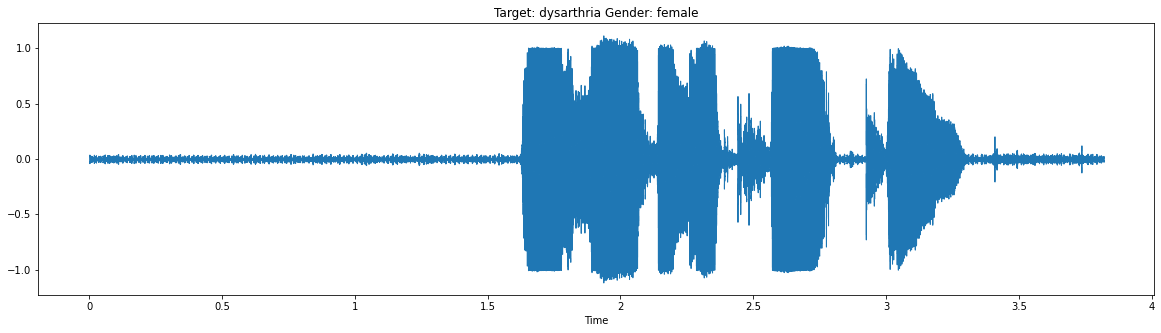

In [12]:
sample = data[(data['is_dysarthria']=='dysarthria') & (data['gender']=='female')] 
get_waveplot(sample['filename'].values[20], sample['is_dysarthria'].values[20], sample['gender'].values[20])
ipd.Audio(sample['filename'].values[20])

## **Visualizing MFCC features**

(128, 165)


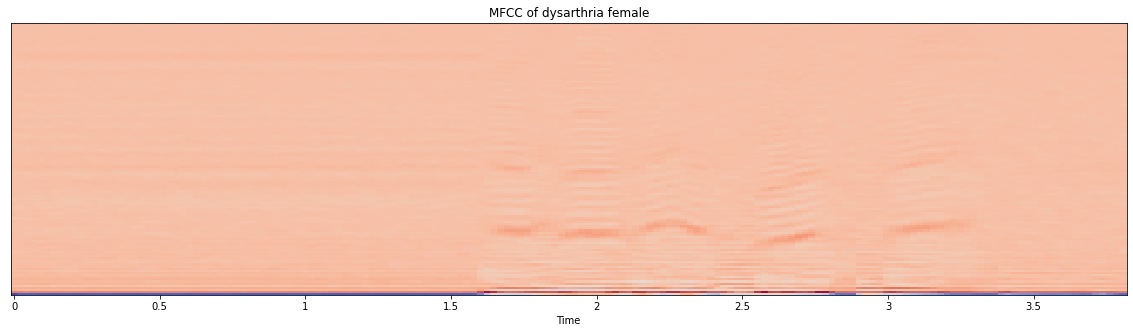

(128, 173)


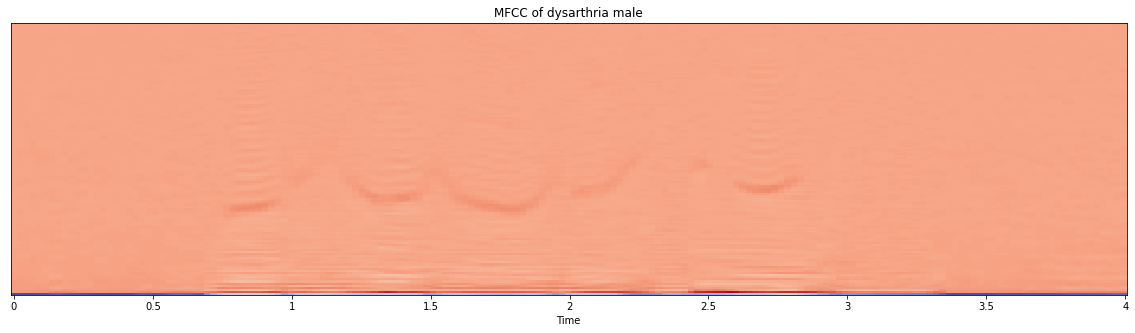

(128, 149)


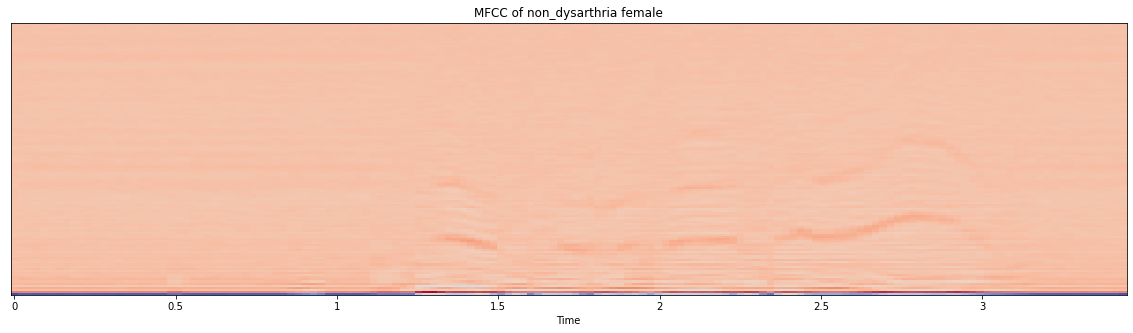

(128, 286)


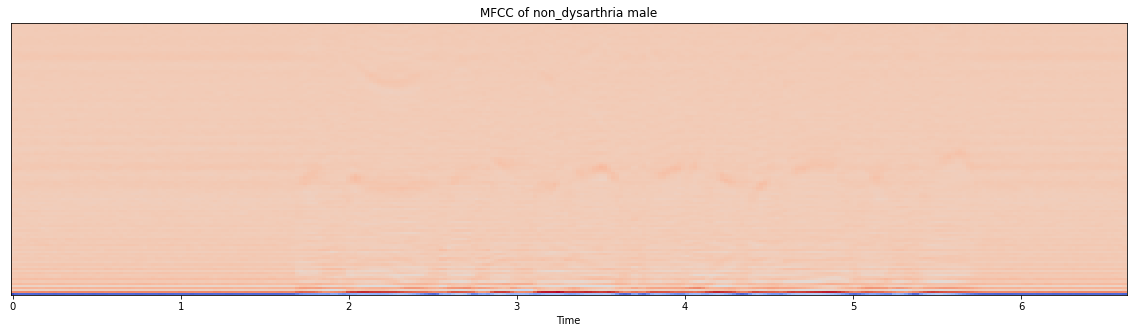

In [13]:
for i in np.unique(data['is_dysarthria']):
    for j in np.unique(data['gender']):
        sample = data[(data['is_dysarthria']==i) & (data['gender']==j)] 
        get_mfcc(sample['filename'].values[20], sample['is_dysarthria'].values[20], sample['gender'].values[20])

## **Visualizing Mel-Spectograms**

(128, 165)


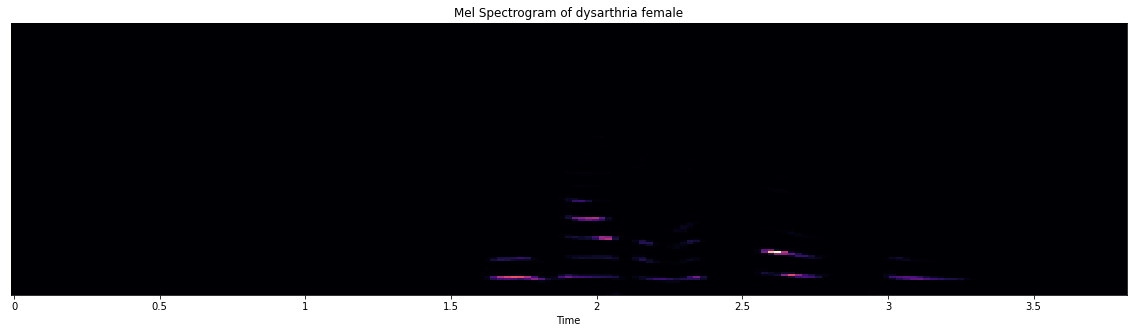

(128, 173)


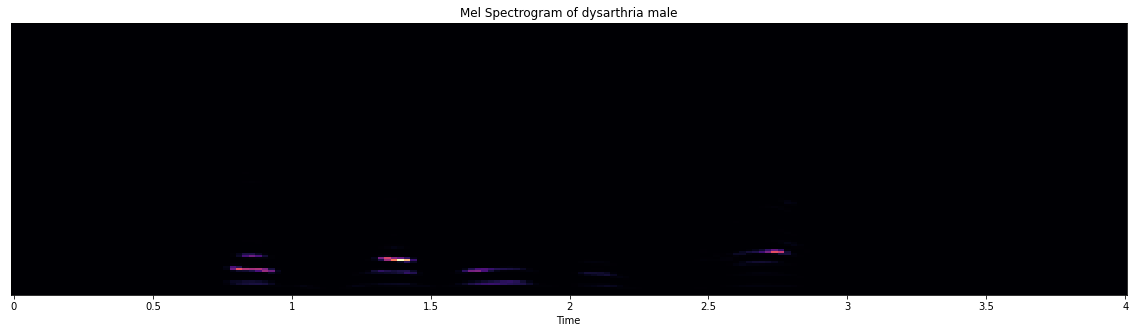

(128, 149)


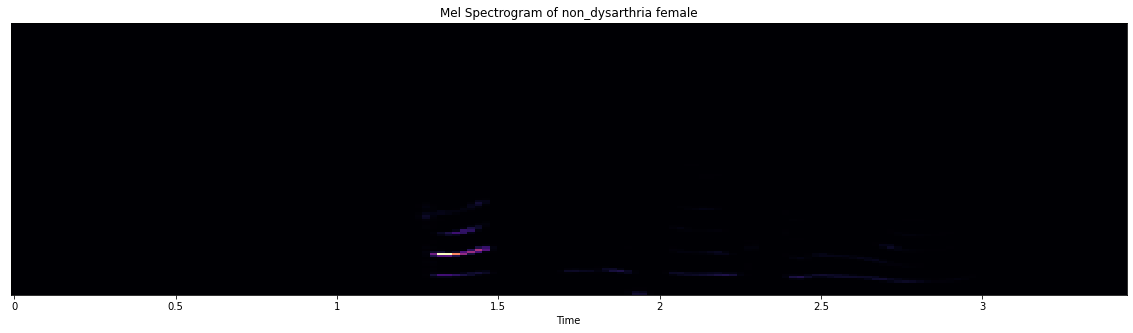

(128, 286)


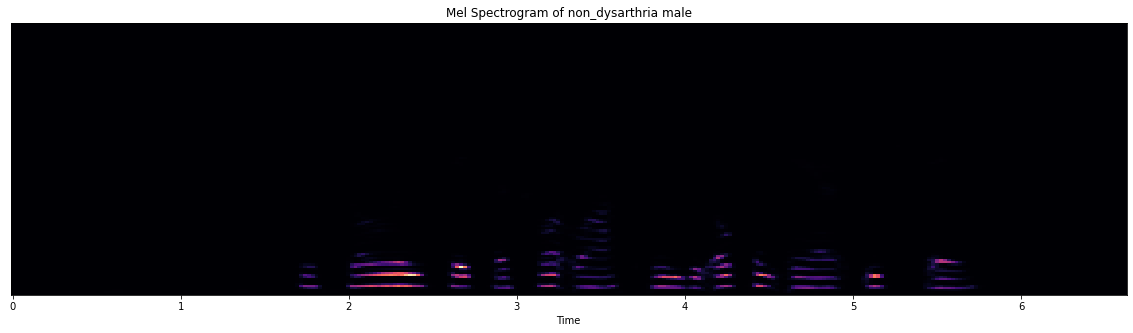

In [14]:
for i in np.unique(data['is_dysarthria']):
    for j in np.unique(data['gender']):
        sample = data[(data['is_dysarthria']==i) & (data['gender']==j)] 
        get_melspec(sample['filename'].values[20], sample['is_dysarthria'].values[20], sample['gender'].values[20])

**Observation:**

Dysarthric samples - the visualization plots have much more darker and has repetitive patterns indicating the slurs present in the speech. 

Non dysarthric samples - have a more spread out visualization. 

## **Extracting MFCC features**

**Maximum 128 MFCCs can be extracted**

In [15]:
def create_mfcc_features(path):
    mfccs = []
    try:
        x, sr = librosa.load(path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
        mfccs = np.mean(mfccs.T, axis=0)
    except:
        print("Error in audio")
    return mfccs

In [16]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [17]:
X_df = pd.DataFrame(data['filename'].progress_apply(lambda x: create_mfcc_features(x)).tolist())

  0%|          | 0/2000 [00:00<?, ?it/s]

C:\Users\akshada\anaconda3\envs\env-tensor\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Error in audio


C:\Users\akshada\anaconda3\envs\env-tensor\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=209
  return f(*args, **kwargs)
C:\Users\akshada\anaconda3\envs\env-tensor\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=583
  return f(*args, **kwargs)
C:\Users\akshada\anaconda3\envs\env-tensor\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=581
  return f(*args, **kwargs)
C:\Users\akshada\anaconda3\envs\env-tensor\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=185
  return f(*args, **kwargs)
C:\Users\akshada\anaconda3\envs\env-tensor\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=946
  return f(*args, **kwargs)
C:\Users\akshada\anaconda3\envs\env-tensor\lib\site-packages

In [18]:
X= X_df.copy()

In [19]:
X_df.loc[pd.isnull(X_df).any(1), :].index.values

array([600], dtype=int64)

In [20]:
X_df = X_df.dropna()
print(X_df.shape)
X_df.head()

(1999, 128)


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-224.438873,104.723663,-19.202602,39.938488,-13.626343,19.401268,-2.989149,7.090681,5.540167,-4.092600,...,1.392820,0.930601,0.773945,1.034358,0.405939,0.070030,0.552779,0.592358,0.169803,-0.219082
1,-302.286743,113.484200,-19.854023,40.338879,-16.874348,21.476727,4.538599,15.209646,7.216095,1.010592,...,1.252204,1.162079,1.028046,1.249662,0.058755,-1.421318,0.025139,-0.040994,-0.033689,-0.771382
2,-306.246368,116.362526,-27.005041,46.734200,-22.540213,24.665691,3.921143,14.105978,8.822407,0.725400,...,0.957378,0.889208,0.483508,1.060317,0.021912,-1.448232,0.280856,0.198465,-0.227241,-0.582114
3,-214.574188,121.374321,-38.831760,39.828735,-27.346233,23.890167,-4.140902,8.613482,4.424286,-0.632522,...,1.101739,0.597243,0.931670,0.690942,0.201179,-0.113483,0.020272,0.346169,-0.066179,-0.264246
4,-283.527588,108.828957,-20.547585,46.923981,-15.656189,26.488243,-0.345028,12.736641,9.059461,-2.463461,...,1.458694,1.620689,0.947342,0.745661,0.545421,-0.161467,0.146885,-0.305346,-0.452934,-0.471084


In [21]:
encoder = LabelEncoder()
y = encoder.fit_transform(data['is_dysarthria'])
y = np.delete (y, 600)
y.shape

(1999,)

In [22]:
x_train, x_val, y_train, y_val = train_test_split(np.array(X_df), y, test_size=0.1)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1)
x_train.shape, x_val.shape, x_test.shape

((1619, 128), (200, 128), (180, 128))

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(x_train)
X_val = sc.transform(x_val)
X_test = sc.transform(x_test)

In [24]:
X_train = X_train.reshape(X_train.shape[0], 16, 8, 1)
X_val = X_val.reshape(X_val.shape[0], 16, 8, 1)
X_test = X_test.reshape(X_test.shape[0], 16, 8, 1)

## **CNN Model**

In [56]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='valid'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='valid'),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 8, 32)         320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 4, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 4, 16)          4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 2, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 2, 8)           1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 1, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0

**Model 1 (Adam Optimizer - Learning Rate = 0.001, Beta 1 = 0.9, Beta 2 = 0.999)**

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
callback_ = EarlyStopping(monitor='val_loss', patience=3)
metrics = [tf.keras.metrics.Recall()]
adam1 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [60]:
model.compile(optimizer= adam1, loss='binary_crossentropy', metrics=metrics)

In [61]:
history = model.fit(X_train, y_train, epochs=100, callbacks=[callback_], validation_data=(X_val, y_val))

Epoch 1/100
51/51 [==============================] - 1s 12ms/step - loss: 0.6381 - recall: 0.5783 - val_loss: 0.4974 - val_recall: 0.8108
Epoch 2/100
51/51 [==============================] - 0s 7ms/step - loss: 0.4896 - recall: 0.7768 - val_loss: 0.3812 - val_recall: 0.9189
Epoch 3/100
51/51 [==============================] - 0s 9ms/step - loss: 0.4064 - recall: 0.8286 - val_loss: 0.2905 - val_recall: 0.9820
Epoch 4/100
51/51 [==============================] - 0s 10ms/step - loss: 0.3019 - recall: 0.8866 - val_loss: 0.2249 - val_recall: 0.8649
Epoch 5/100
51/51 [==============================] - 1s 12ms/step - loss: 0.2415 - recall: 0.9112 - val_loss: 0.1680 - val_recall: 0.9009
Epoch 6/100
51/51 [==============================] - 1s 11ms/step - loss: 0.1991 - recall: 0.9248 - val_loss: 0.1689 - val_recall: 0.9009
Epoch 7/100
51/51 [==============================] - 1s 13ms/step - loss: 0.1608 - recall: 0.9494 - val_loss: 0.1002 - val_recall: 0.9550
Epoch 8/100
51/51 [=================

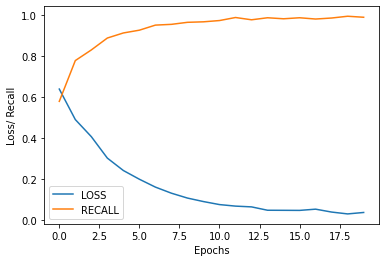

In [62]:
plt.plot(history.history['loss'], label="LOSS")
plt.plot(history.history['recall'], label="RECALL")
plt.xlabel('Epochs')
plt.ylabel('Loss/ Recall')

plt.legend(loc='best')
plt.show()

In [63]:
print("Validation Loss: ", model.evaluate(X_test, y_test)[0])
print("Validation Recall: ", model.evaluate(X_test, y_test)[1])

6/6 [==============================] - 0s 3ms/step - loss: 0.0208 - recall: 1.0000
Validation Loss:  0.020810266956686974
6/6 [==============================] - 0s 3ms/step - loss: 0.0208 - recall: 1.0000
Validation Recall:  1.0


In [64]:
y_pred = model.predict(X_test)

y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0
y_pred = y_pred.astype("int")
y_pred = encoder.inverse_transform(y_pred)

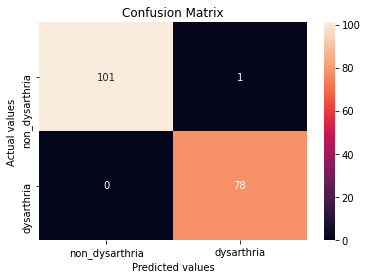

In [65]:
# Confusion matrix
cf_matrix = confusion_matrix(encoder.inverse_transform(y_test), y_pred)
categories = list(data['is_dysarthria'].unique())
sns.heatmap(cf_matrix, annot = True, fmt = '', xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title ("Confusion Matrix")
plt.show()

In [96]:
print("F1-score of model 1: ", f1_score((y_test), encoder.transform(y_pred)))

F1-score of model 1:  0.9936305732484078


**Model 2 (Adam Optimizer - Learning Rate = 0.001, Beta 1 = 0.6, Beta 2 = 0.77)**

In [66]:
adam2 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.8, beta_2=0.9)

In [67]:
model.compile(optimizer=adam2, loss='binary_crossentropy', metrics=metrics)

In [68]:
history = model.fit(X_train, y_train, epochs=500, callbacks=[callback_], validation_data=(X_val, y_val))

Epoch 1/500
51/51 [==============================] - 1s 15ms/step - loss: 0.0360 - recall: 0.9865 - val_loss: 0.0526 - val_recall: 0.9730
Epoch 2/500
51/51 [==============================] - 1s 11ms/step - loss: 0.0421 - recall: 0.9827 - val_loss: 0.0464 - val_recall: 0.9730
Epoch 3/500
51/51 [==============================] - 0s 10ms/step - loss: 0.0324 - recall: 0.9877 - val_loss: 0.1361 - val_recall: 0.9459
Epoch 4/500
51/51 [==============================] - 1s 11ms/step - loss: 0.0390 - recall: 0.9840 - val_loss: 0.0693 - val_recall: 0.9730
Epoch 5/500
51/51 [==============================] - 0s 10ms/step - loss: 0.0358 - recall: 0.9889 - val_loss: 0.0733 - val_recall: 0.9730


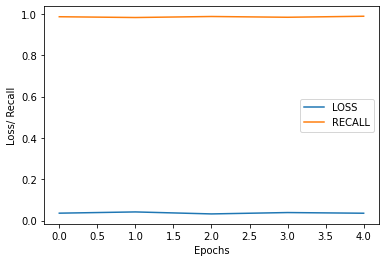

In [69]:
plt.plot(history.history['loss'], label="LOSS")
plt.plot(history.history['recall'], label="RECALL")
plt.xlabel('Epochs')
plt.ylabel('Loss/ Recall')

plt.legend(loc='best')
plt.show()

In [70]:
print("Validation Loss: ", model.evaluate(X_test, y_test)[0])
print("Validation Recall: ", model.evaluate(X_test, y_test)[1])
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.0429 - recall: 1.0000
Validation Loss:  0.042939119040966034
6/6 [==============================] - 0s 3ms/step - loss: 0.0429 - recall: 1.0000
Validation Recall:  1.0
6/6 [==============================] - 0s 3ms/step - loss: 0.0429 - recall: 1.0000


[0.042939119040966034, 1.0]

In [71]:
y_pred2 = model.predict(X_test)

y_pred2[y_pred2>=0.5] = 1
y_pred2[y_pred2<0.5] = 0
y_pred2 = y_pred2.astype("int")
y_pred2 = encoder.inverse_transform(y_pred2)

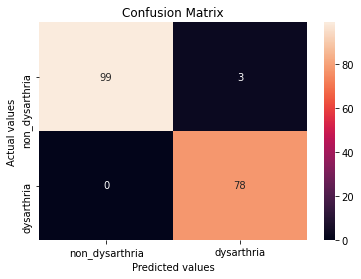

In [72]:
# Confusion matrix
cf_matrix = confusion_matrix(encoder.inverse_transform(y_test), y_pred2)
categories = list(data['is_dysarthria'].unique())
sns.heatmap(cf_matrix, annot = True, fmt = '', xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title ("Confusion Matrix")
plt.show()

In [95]:
print("F1-score of model 2: ", f1_score((y_test), encoder.transform(y_pred2)))

F1-score of model 2:  0.9811320754716981


**Model 3 (Adam Optimizer - Learning Rate = 0.0001, Beta 1 = 0.9, Beta 2 = 0.999)**

In [80]:
adam3 = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

In [81]:
model.compile(optimizer=adam3, loss='binary_crossentropy', metrics=metrics)

In [82]:
history = model.fit(X_train, y_train, epochs=500, callbacks=[callback_], validation_data=(X_val, y_val))

Epoch 1/500
51/51 [==============================] - 1s 11ms/step - loss: 0.3733 - recall: 0.8931 - val_loss: 0.1315 - val_recall: 0.9279
Epoch 2/500
51/51 [==============================] - 0s 7ms/step - loss: 0.1218 - recall: 0.9618 - val_loss: 0.1248 - val_recall: 0.9369
Epoch 3/500
51/51 [==============================] - 1s 10ms/step - loss: 0.1392 - recall: 0.9618 - val_loss: 0.0613 - val_recall: 0.9550
Epoch 4/500
51/51 [==============================] - 1s 12ms/step - loss: 0.0842 - recall: 0.9704 - val_loss: 0.1243 - val_recall: 0.9730
Epoch 5/500
51/51 [==============================] - 1s 11ms/step - loss: 0.1050 - recall: 0.9667 - val_loss: 0.0774 - val_recall: 0.9640
Epoch 6/500
51/51 [==============================] - 1s 12ms/step - loss: 0.0968 - recall: 0.9716 - val_loss: 0.0620 - val_recall: 0.9820


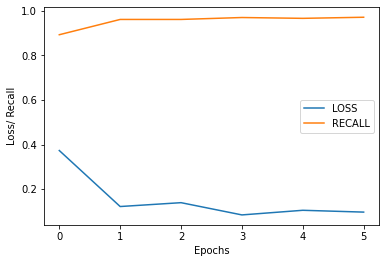

In [83]:
plt.plot(history.history['loss'], label="LOSS")
plt.plot(history.history['recall'], label="RECALL")
plt.xlabel('Epochs')
plt.ylabel('Loss/ Recall')

plt.legend(loc='best')
plt.show()

In [84]:
print("Validation Loss: ", model.evaluate(X_test, y_test)[0])
print("Validation Recall: ", model.evaluate(X_test, y_test)[1])
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.0540 - recall: 1.0000
Validation Loss:  0.053965430706739426
6/6 [==============================] - 0s 3ms/step - loss: 0.0540 - recall: 1.0000
Validation Recall:  1.0
6/6 [==============================] - 0s 3ms/step - loss: 0.0540 - recall: 1.0000


[0.053965430706739426, 1.0]

In [85]:
y_pred3 = model.predict(X_test)

y_pred3[y_pred3>=0.5] = 1
y_pred3[y_pred3<0.5] = 0
y_pred3 = y_pred3.astype("int")
y_pred3 = encoder.inverse_transform(y_pred3)

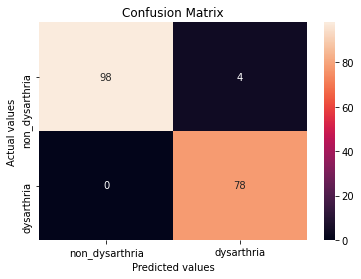

In [86]:
# Confusion matrix
cf_matrix = confusion_matrix(encoder.inverse_transform(y_test), y_pred3)
categories = list(data['is_dysarthria'].unique())
sns.heatmap(cf_matrix, annot = True, fmt = '', xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title ("Confusion Matrix")
plt.show()

In [94]:
print("F1-score of model 3: ", f1_score((y_test), encoder.transform(y_pred3)))

F1-score of model 3:  0.975


**Comparison of the 3 models:**

We can see that when the values of beta_1 and beta_2 are reduced in model 2 and the value of learning rate is kept constant, the number of training steps reduce drastically. Model 2 gives increased number of false positives. 

When the beta values are kept same as model 1 and the learning rate is reduced, we again see a decrease in epochs relative to the first model. False positives increase in model 3. 

Conclusion: Best model is model 1 (Small learning rate and beta values close to 1) 